In [2]:
%load_ext autoreload
%autoreload 2

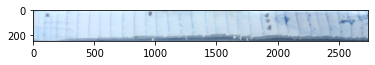

In [202]:
import cv2
import torch
import torchvision
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
import PIL

#Load Image in BGR instead of RGB
img = cv2.imread("260_Edit.png")
plt.imshow(img)

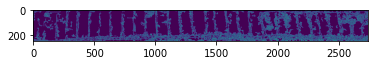

In [203]:
#Use Canny algorithm to detect lines with a threshold of 0-33
edges = cv2.Canny(img,0,33)
plt.imshow(edges)

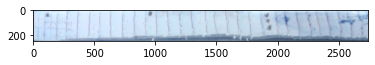

In [204]:
import math

start = 0
z_count = 0
end = start
block_size = 0

new_arr = [[0]*len(edges[0]) for i in range(len(edges))]

for row in range(len(edges)):
    for col in range(len(edges[row])):
        if edges[row][col] >= 128 and block_size == 0: # If a pixel is a ring start a block section to find center of ring
            start = col
            block_size += 1
        elif edges[row][col] >= 128 and block_size > 0: # Increase block size if it's still a ring
            end = col
            block_size += 1
            z_count = 0
        elif edges[row][col] < 128 and block_size > 0: # If not a line start counting to make sure it isn't an innacurate reading
            z_count += 1
            block_size += 1
        elif edges[row][col] < 128 and block_size == 0: # Skip when not at a line
            z_count = 0
            pass
        if z_count > 19 and block_size != 1: # When a line is found, find the center of it and mark as 1 on a new array
            #print(str(row) + " " + str(math.floor((end+start)/2)) + " " + str(end) + " " + str(start))
            new_arr[row][math.floor((end+start)/2)] = 1
            block_size = 0
            end = start
        elif z_count > 19 and block_size == 1: # If a random pixel was thought to be a line do not account for it.
            block_size = 0
            z_count = 0

# Recolor the original image to show red where the rings are estimated to be
for row in range(len(new_arr)):
    for col in range(len(new_arr[row])):
        if new_arr[row][col] == 1:
            img[row,col,:] = [255, 0, 0]
            
plt.imshow(img)
   
            

In [205]:
import pprint as pp

ring_array = []
last_index = 0
count = 0

#According to our image with a ruler in it, one millimeter is 40 pixels
#Go through the new array and pick out the length of each ring by pixel length / 40
for x in range(len(new_arr[6])):
    if new_arr[6][x] == 1:
        ring_array.append(f"Ring {count} length(mm): {(x-last_index)/40}")
        count += 1
        last_index = x
#Use Pretty Print to neatly print the array
pp.pprint(ring_array)


['Ring 0 length(mm): 1.55',
 'Ring 1 length(mm): 5.425',
 'Ring 2 length(mm): 1.925',
 'Ring 3 length(mm): 4.85',
 'Ring 4 length(mm): 2.125',
 'Ring 5 length(mm): 2.6',
 'Ring 6 length(mm): 2.25',
 'Ring 7 length(mm): 3.325',
 'Ring 8 length(mm): 2.375',
 'Ring 9 length(mm): 1.2',
 'Ring 10 length(mm): 1.95',
 'Ring 11 length(mm): 0.35',
 'Ring 12 length(mm): 2.375',
 'Ring 13 length(mm): 2.125',
 'Ring 14 length(mm): 0.8',
 'Ring 15 length(mm): 1.8',
 'Ring 16 length(mm): 2.35',
 'Ring 17 length(mm): 2.3',
 'Ring 18 length(mm): 8.675',
 'Ring 19 length(mm): 1.275',
 'Ring 20 length(mm): 2.05',
 'Ring 21 length(mm): 2.625',
 'Ring 22 length(mm): 1.9',
 'Ring 23 length(mm): 1.575',
 'Ring 24 length(mm): 1.4',
 'Ring 25 length(mm): 0.95',
 'Ring 26 length(mm): 0.725',
 'Ring 27 length(mm): 1.925',
 'Ring 28 length(mm): 2.025',
 'Ring 29 length(mm): 1.475']


In [206]:
ring_count = []
count = 0
ring_total = 0
#Finds the average ring count found through each row in the image
for row in range(len(new_arr)):
    for x in range(len(new_arr[row])):
        if new_arr[row][x] == 1:
            count += 1
    ring_count.append(f"Row {row} count: {count}")
    ring_total += count
    count = 0
print(ring_total/len(edges))
#Pretty print to neatly print the array
pp.pprint(ring_count)

29.943775100401606
['Row 0 count: 27',
 'Row 1 count: 22',
 'Row 2 count: 27',
 'Row 3 count: 29',
 'Row 4 count: 28',
 'Row 5 count: 26',
 'Row 6 count: 30',
 'Row 7 count: 27',
 'Row 8 count: 27',
 'Row 9 count: 29',
 'Row 10 count: 31',
 'Row 11 count: 32',
 'Row 12 count: 33',
 'Row 13 count: 29',
 'Row 14 count: 31',
 'Row 15 count: 29',
 'Row 16 count: 26',
 'Row 17 count: 25',
 'Row 18 count: 30',
 'Row 19 count: 29',
 'Row 20 count: 29',
 'Row 21 count: 30',
 'Row 22 count: 32',
 'Row 23 count: 32',
 'Row 24 count: 34',
 'Row 25 count: 32',
 'Row 26 count: 32',
 'Row 27 count: 31',
 'Row 28 count: 28',
 'Row 29 count: 29',
 'Row 30 count: 31',
 'Row 31 count: 28',
 'Row 32 count: 29',
 'Row 33 count: 33',
 'Row 34 count: 31',
 'Row 35 count: 30',
 'Row 36 count: 29',
 'Row 37 count: 28',
 'Row 38 count: 30',
 'Row 39 count: 35',
 'Row 40 count: 34',
 'Row 41 count: 33',
 'Row 42 count: 35',
 'Row 43 count: 32',
 'Row 44 count: 30',
 'Row 45 count: 31',
 'Row 46 count: 32',
 'Ro